In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (10,5)


# Dados de exemplo
X = np.array([[1], [2], [3], [4], [5],[6],[7],[8],[9],[10],[11]])
y = np.array([2, 4, 6, 8, 10, 12, 13, 13.5, 13, 11, 9])

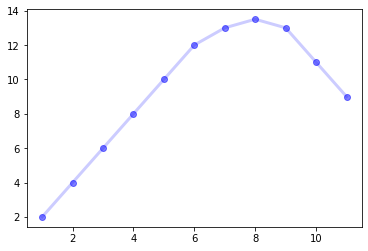

In [3]:
#Dados não lineares para melhor teste do algoritmo

plt.scatter(X, y, c="blue", alpha=0.5)
plt.plot(X, y, alpha=0.2,linewidth=3,color="blue")

plt.show()

Importante entender:

O bootstraping no contexto do Random Forest refere-se à técnica de amostragem com reposição usada para criar subconjuntos de dados a partir do conjunto de treinamento original. O termo "bootstrap" é uma combinação das palavras "boot" (inicial) e "strap" (alça), originando da expressão "puxar-se pelos próprios cadarços" ou "levantar-se pelos próprios puxões das alças das botas". Em estatísticas e aprendizado de máquina, o bootstrap é uma técnica poderosa para criar várias amostras "bootstrap" de um conjunto de dados maior.

No contexto do Random Forest, o bootstraping é usado da seguinte maneira:

Amostragem com Reposição: Para cada árvore no Random Forest, um subconjunto de dados é criado a partir do conjunto de treinamento original, fazendo amostragem com reposição. Isso significa que um ponto de dados pode ser amostrado mais de uma vez no subconjunto, enquanto outros podem não ser incluídos. Essa técnica cria variedade nos subconjuntos de dados, o que é uma parte fundamental do processo de aleatorização no Random Forest.

Subconjuntos Aleatórios: Além do bootstraping, o Random Forest também utiliza a seleção aleatória de características (aleatorização de recursos) ao criar cada árvore. Isso significa que, para cada divisão na árvore de decisão, apenas um subconjunto aleatório das características é considerado para a divisão, o que aumenta a diversidade e a independência das árvores.

:Dai vem a origem do Random

#### From Skratch

In [44]:
n_estimators = 200

max_depth=5

predictions = []

for _ in range(n_estimators):
    # Crie uma árvore de decisão
    tree = DecisionTreeRegressor(max_depth=max_depth)
    
    # Amostragem bootstrap dos dados (subamostragem com reposição)
    indices = np.random.choice(range(len(X)), len(X), replace=True) #aleatoriamente seleciona as amostras
    X_subset, y_subset = X[indices], y[indices] #inclui em um novo subset a amostragem selecionada
    
    # árvore de decisão na subamostra, utilizando se os subsamples para evitar o viés 
    # o bootstraping aqui utilizado é parametrico por que assumimos como base o teorema do limite central
    tree.fit(X_subset, y_subset)
    
    # previsão e adicione à lista de previsões
    y_pred = tree.predict(X)
    predictions.append(y_pred)

# media de todas as iterações é a sua previsão final
final_prediction = np.mean(predictions, axis=0)
rms_sk = mean_squared_error(y, final_prediction)

In [45]:
print("RMSE Random Forest from skratch:",rms_sk)


RMSE Random Forest from skratch: 0.2504965593434345


#### Random Forest SKlearn

In [46]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth)
est.fit(X, y)
pred_rf = est.predict(X)
rms_rf = mean_squared_error(y, pred_rf)

In [47]:
print("RMSE Random Forest from sklearn:",rms_rf)

RMSE Random Forest from sklearn: 0.2554359453914143


#### Versus

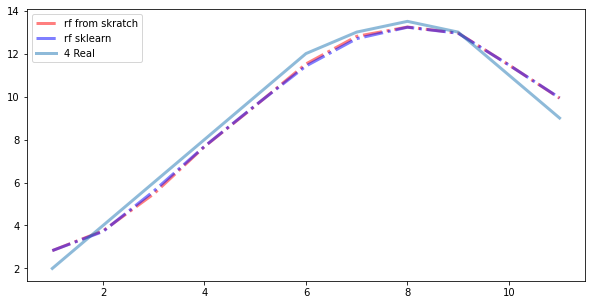

In [48]:
plt.plot(X, pd.DataFrame(final_prediction), '-.',label='rf from skratch', alpha=0.5,color="red",linewidth=3)
plt.plot(X, pd.DataFrame(pred_rf), '-.',label='rf sklearn', alpha=0.5,color="blue",linewidth=3)
plt.plot(X, pd.DataFrame(y),label='4 Real', alpha=0.5,linewidth=3)


plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.show()

In [ ]:
#performance parece muito similar, diferença de apenas 0,005 no rmse que consiste a loss function